<a href="https://colab.research.google.com/github/KatyaFAF172/FIA/blob/Lab4-1/Lab3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#install keras
!pip install -q keras

In [2]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt

In [3]:
#upload our txt file
from google.colab import files
uploaded = files.upload()

Saving apartmentComplexData.csv to apartmentComplexData.csv


### Reading data

In [4]:
import pandas as pd

df = pd.read_csv('apartmentComplexData.csv')

### Adding columns

In [5]:
column = ['value1','value2','complexAge','totalRooms','totalBedroom','complexInhabitants','apartmentsNr','value8','medianCompexValue']
df = pd.read_csv('apartmentComplexData.csv',names=column)
df.head()

,value1,value2,complexAge,totalRooms,totalBedroom,complexInhabitants,apartmentsNr,value8,medianCompexValue
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0


### Feature selection by task

In [6]:
df.drop(['value1','value2','value8'],axis=1,inplace=True)
df.head()

,complexAge,totalRooms,totalBedroom,complexInhabitants,apartmentsNr,medianCompexValue
0,41.0,880.0,129.0,322.0,126.0,452600.0
1,21.0,7099.0,1106.0,2401.0,1138.0,358500.0
2,52.0,1467.0,190.0,496.0,177.0,352100.0
3,52.0,1274.0,235.0,558.0,219.0,341300.0
4,52.0,1627.0,280.0,565.0,259.0,342200.0


In [7]:
dataset = df[['complexAge','totalRooms','totalBedroom','complexInhabitants','apartmentsNr','medianCompexValue']]

In [8]:
feature_dataset = dataset.iloc[:,0:5]
target_dataset = dataset.iloc[:,-1]


In [9]:
#from sklearn.preprocessing import StandardScaler

# scale feature dataset
#sc_X = StandardScaler()
#X = sc_X.fit_transform(np.array(feature_dataset))
# scale target dataset
#sc_y = StandardScaler()
#y = sc_y.fit_transform(np.array(target_dataset).reshape(-1,1))

from sklearn.preprocessing import MinMaxScaler
sc_X = MinMaxScaler()
sc_y = MinMaxScaler()
X = sc_X.fit_transform(np.array(feature_dataset))
y = sc_y.fit_transform(np.array(target_dataset).reshape(-1,1))

In [10]:
# train test split
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, shuffle=True)

In [11]:
# Sequential Artificial Neural Network Model
from keras.models import Sequential
from keras.layers import Dense, Dropout

# define the keras model
model = Sequential()
# Layer 1
model.add(Dense(50, input_dim=X_train.shape[1], activation='sigmoid'))
# Dropout regularization is added to avoid overfitting
model.add(Dropout(0.1))
# Layer 2
model.add(Dense(50, activation='sigmoid'))
# Dropout regularization is added to avoid overfitting
model.add(Dropout(0.1))
# Layer 3
# Output Layer
model.add(Dense(1))
#Compile the model
model.compile(loss='mae', optimizer='adam', metrics=['mae'])

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 50)                300       
_________________________________________________________________
dropout (Dropout)            (None, 50)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 50)                2550      
_________________________________________________________________
dropout_1 (Dropout)          (None, 50)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 51        
Total params: 2,901
Trainable params: 2,901
Non-trainable params: 0
_________________________________________________________________


In [12]:
# train the model in 32 batch size and 100 epochs
model.fit(X_train, y_train, batch_size=32, epochs=300)

Epoch 1/300
516/516 [==============================] - 1s 1ms/step - loss: 0.2720 - mae: 0.2720
Epoch 2/300
516/516 [==============================] - 1s 1ms/step - loss: 0.1965 - mae: 0.1965
Epoch 3/300
516/516 [==============================] - 1s 1ms/step - loss: 0.1851 - mae: 0.1851
Epoch 4/300
516/516 [==============================] - 1s 1ms/step - loss: 0.1858 - mae: 0.1858
Epoch 5/300
516/516 [==============================] - 1s 1ms/step - loss: 0.1844 - mae: 0.1844
Epoch 6/300
516/516 [==============================] - 1s 1ms/step - loss: 0.1838 - mae: 0.1838
Epoch 7/300
516/516 [==============================] - 1s 1ms/step - loss: 0.1832 - mae: 0.1832
Epoch 8/300
516/516 [==============================] - 1s 1ms/step - loss: 0.1824 - mae: 0.1824
Epoch 9/300
516/516 [==============================] - 1s 1ms/step - loss: 0.1825 - mae: 0.1825
Epoch 10/300
516/516 [==============================] - 1s 1ms/step - loss: 0.1810 - mae: 0.1810
Epoch 11/300
516/516 [=================

In [13]:
# prediction on training dataset
train_prediction = model.predict(X_train)
train_result = pd.DataFrame(sc_y.inverse_transform(y_train))
train_result.columns = ['actual']
train_result['predicted'] = sc_y.inverse_transform(train_prediction)
train_result

,actual,predicted
0,153100.0,138168.562500
1,139400.0,145784.968750
2,163900.0,137371.187500
3,146100.0,158117.078125
4,388100.0,273171.593750
...,...,...
16507,129200.0,179036.796875
16508,325000.0,208408.812500
16509,331200.0,285870.156250
16510,190700.0,214830.921875


In [14]:
from sklearn.metrics import mean_squared_error
from math import sqrt

rms = sqrt(mean_squared_error(y_train, model.predict(X_train)))
print ('Training Data have Root Mean Squared Error of {}'.format(rms))

Training Data have Root Mean Squared Error of 0.1992605832039034


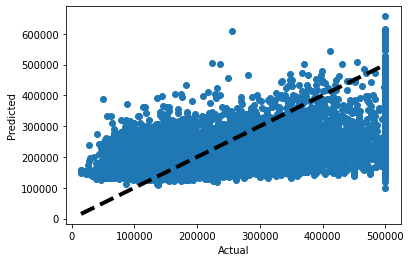

In [15]:
# Vizualiation (actual vs predicted) on training dataset
fig, ax = plt.subplots()
ax.scatter(train_result['actual'], train_result['predicted'])
ax.plot([train_result['actual'].min(), train_result['actual'].max()], [train_result['actual'].min(), train_result['actual'].max()], 'k--', lw=4)
ax.set_xlabel('Actual')
ax.set_ylabel('Predicted')
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


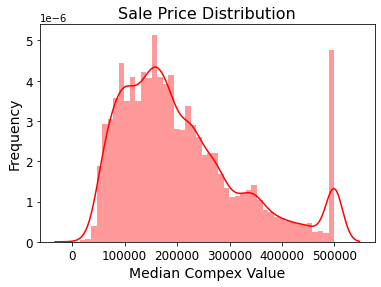

In [ ]:
#Distribution plot
import seaborn as sb # visualization

sb.distplot(df['medianCompexValue'], color = 'r')
plt.title('Sale Price Distribution', fontsize = 16)
plt.xlabel('Median Compex Value', fontsize = 14)
plt.ylabel('Frequency', fontsize = 14)
plt.xticks(fontsize = 12)
plt.yticks(fontsize = 12)

plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


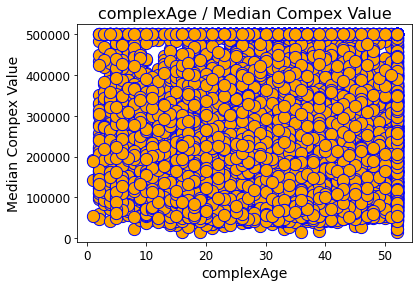

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


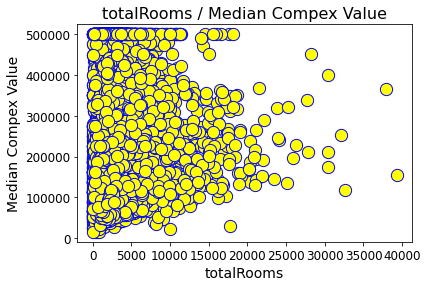

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


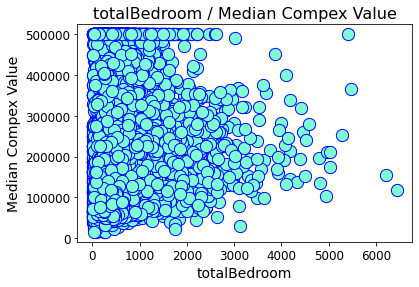

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


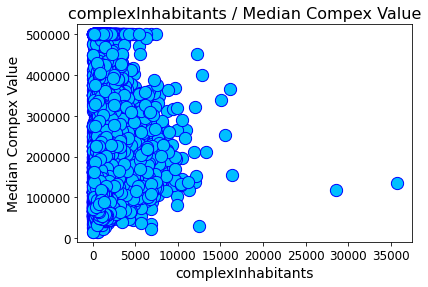

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


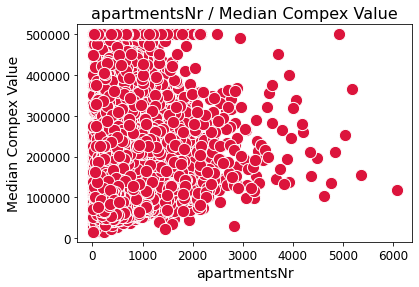

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


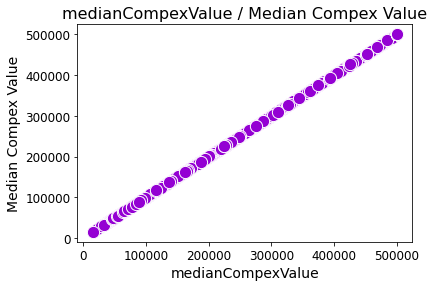

In [ ]:
# Scatter plot
import matplotlib.pyplot as plt # visualization
import seaborn as sb # visualization

def scatter_df(y_var):
    scatter_df = df.drop(y_var, axis = 1)
    i = df.columns
    
    plot1 = sb.scatterplot(i[0], y_var, data = df, color = 'orange', edgecolor = 'b', s = 150)
    plt.title('{} / Median Compex Value'.format(i[0]), fontsize = 16)
    plt.xlabel('{}'.format(i[0]), fontsize = 14)
    plt.ylabel('Median Compex Value', fontsize = 14)
    plt.xticks(fontsize = 12)
    plt.yticks(fontsize = 12)
    plt.show()
    
    plot2 = sb.scatterplot(i[1], y_var, data = df, color = 'yellow', edgecolor = 'b', s = 150)
    plt.title('{} / Median Compex Value'.format(i[1]), fontsize = 16)
    plt.xlabel('{}'.format(i[1]), fontsize = 14)
    plt.ylabel('Median Compex Value', fontsize = 14)
    plt.xticks(fontsize = 12)
    plt.yticks(fontsize = 12)
    plt.show()
    
    plot3 = sb.scatterplot(i[2], y_var, data = df, color = 'aquamarine', edgecolor = 'b', s = 150)
    plt.title('{} / Median Compex Value'.format(i[2]), fontsize = 16)
    plt.xlabel('{}'.format(i[2]), fontsize = 14)
    plt.ylabel('Median Compex Value', fontsize = 14)
    plt.xticks(fontsize = 12)
    plt.yticks(fontsize = 12)
    plt.show()
    
    plot4 = sb.scatterplot(i[3], y_var, data = df, color = 'deepskyblue', edgecolor = 'b', s = 150)
    plt.title('{} / Median Compex Value'.format(i[3]), fontsize = 16)
    plt.xlabel('{}'.format(i[3]), fontsize = 14)
    plt.ylabel('Median Compex Value', fontsize = 14)
    plt.xticks(fontsize = 12)
    plt.yticks(fontsize = 12)
    plt.show()
    
    plot5 = sb.scatterplot(i[4], y_var, data = df, color = 'crimson', edgecolor = 'white', s = 150)
    plt.title('{} / Median Compex Value'.format(i[4]), fontsize = 16)
    plt.xlabel('{}'.format(i[4]), fontsize = 14)
    plt.ylabel('Median Compex Value', fontsize = 14)
    plt.xticks(fontsize = 12)
    plt.yticks(fontsize = 12)
    plt.show()
    
    plot6 = sb.scatterplot(i[5], y_var, data = df, color = 'darkviolet', edgecolor = 'white', s = 150)
    plt.title('{} / Median Compex Value'.format(i[5]), fontsize = 16)
    plt.xlabel('{}'.format(i[5]), fontsize = 14)
    plt.ylabel('Median Compex Value', fontsize = 14)
    plt.xticks(fontsize = 12)
    plt.yticks(fontsize = 12)
    plt.show()
    
scatter_df('medianCompexValue')

In [ ]:
from sklearn.linear_model import LinearRegression # OLS algorithm
from termcolor import colored as cl # text customization
from sklearn.metrics import explained_variance_score as evs # evaluation metric

ols = LinearRegression()
ols.fit(X_train, y_train)
ols_yhat = ols.predict(X_test)

print(cl('Explained Variance Score of OLS model is {}'.format(evs(y_test, ols_yhat)), attrs = ['bold']))

Explained Variance Score of OLS model is 0.1714278745813137


Prediction on test data